In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)  #가장 가까운 3개

In [3]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)  #몇 개를 선택하느냐에 따라 정확도 달라짐

0.96

In [5]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)  #훈련, 테스트 반반
#이거는 테스트용이 아닌 훈련ver1, 훈련ver2니까 0.5씩 나눈 것

model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9333333333333333

In [6]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9866666666666667, 0.9333333333333333)

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5)  #전체 개수를 5개의 그룹으로 나눠 교차검증 함

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [8]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut())  #하나만 테스트, 나머지 다 훈련
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
scores.mean()  #위의 150건에 대한 평균

0.96

## 과적합과 저적합
- 과적합 = 고분산 모델, 훈련정확도 높음, 검증정확도 낮음
- 저적합 = 저분산 모델, 훈련정확도 낮음, 검증정확도 낮음

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [19]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

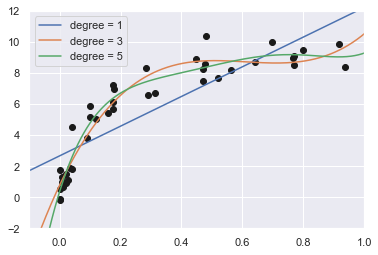

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'k')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best')
#1차 방정식 = 저적합
#5차 방정식 = 과적합
#3차 방정식 => 최적의 모델!!

In [13]:
'''from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X,
                                         'polynomialfetures_degree')

plt.plot(degree, np.median(train_score, 1), color = 'b', label = 'train')
plt.plot(degree, np.median(val_score, 1), color = 'r', label = 'validation')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')'''

"from sklearn.model_selection import validation_curve\ndegree = np.arange(0, 21)\n\ntrain_score, val_score = validation_curve(PolynomialRegression(), X,\n                                         'polynomialfetures_degree')\n\nplt.plot(degree, np.median(train_score, 1), color = 'b', label = 'train')\nplt.plot(degree, np.median(val_score, 1), color = 'r', label = 'validation')\nplt.legend(loc = 'best')\nplt.ylim(0, 1)\nplt.xlabel('degree')\nplt.ylabel('score')"

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

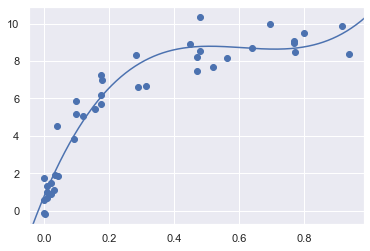

In [14]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)  #3임 = 3차원 곡선임!! (함수 설정을 그렇게 했어)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

In [15]:
from sklearn.model_selection import GridSearchCV  #최적의 모델 찾아줌

param_grid = {'polynimialfeatures_degree':np.arange(21),
             'linearregression_fit_intercept':[True, False],
             'linearregression_normalize':[True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [16]:
#grid.fit(X, y)